<a href="https://colab.research.google.com/github/luisgvs/Trabalho_CAM304_Eduardo/blob/main/Soluc_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GRUPO: Luis Vitorino, Francisco Felix, João Paulo, Edmar.

# CAM304

## REDES NEURAIS E APRENDIZAGEM EM PROFUNDIDADE

## Rede de Convolução / Visão Computacional

### Prof. Eduardo Luz / Eduluz@ufop.edu.br

Objetivos:

- Aplicação de filtros em imagens por meio de convolução
- Entendimento do uso de stride, padding e pooling
- Modelagem de uma rede de convolução para o problema de rec. de face da AT&T
- Uso do VGG pr-e-treinado como um extrator de caracterĩsticas
- Uso do MobileNet pré-treinado para classificação de faces : transferência de aprenzagem
- Notebook baseado em tensorflow e Keras.

Data da entrega : a ser definido

- Complete o código (marcado com ToDo) e quando requisitado, escreva textos diretamente nos notebooks. Onde tiver *None*, substitua pelo seu código.
- Crie um repositório no github para o grupo e me convide como colaborador (eduluzufop). Por fim, me envie o link do github.


# 1. Aplicando filtros e entendendo padding, stride e pooling (20pt)

## 1.1. Importando pacotes e montando o drive

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras import datasets, layers, models
import os
import skimage
from skimage import io
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import resize

## 1.2. Carregando uma imagem

Carregue um imagem do disco, para usar como exemplo.

sample image shape:  (512, 512, 3)


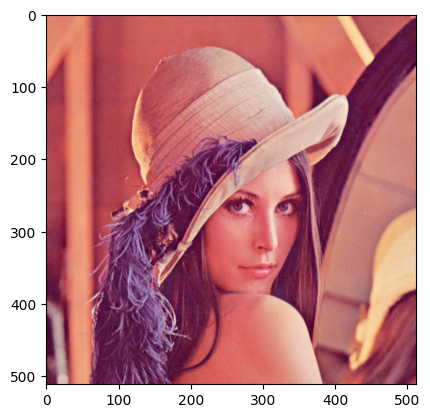

In [ ]:
# carrega imagem de exemplo
sample_image = imread("/content/drive/My Drive/Lenna.png")  ## Carregando a imagem do drive
sample_image= sample_image.astype(float)                    ## Convertendo em flot

size = sample_image.shape
print("sample image shape: ", sample_image.shape)

plt.imshow(sample_image.astype('uint8'));                   ## Exibir imagem

In [ ]:
# veja o shape da imagem
sample_image.shape

(512, 512, 3)

## 1.3. Criando e aplicando um filtro com convolução

Utilize o tf/Keras para aplicar o filtro. Observe que nesta etapa não há necessidade de treinamento algum. O código abaixo cria 3 filtros de tamanho 5x5, e adiciona padding de forma a manter a imagem de saída (filtrada) do mesmo tamanho da imagem de entrada (padding ="same").

In [ ]:
#cria um objeto sequencial com apenas uma camada de convolução do tipo tf.keras.layers.Conv2D
conv = Sequential([
    Conv2D(filters=3, kernel_size=(5, 5), padding="same",
           input_shape=(None, None, 3))
])
conv.output_shape

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


(None, None, None, 3)

In [ ]:
conv.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, None, None, 3)       │             228 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 228 (912.00 B)

 Trainable params: 228 (912.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# com TF/kertas, as convoluções esperam vetores no formato : (batch_size, dim1, dim2, dim3). Ou seja, a primeria posição é o tamanho do lote.
# Uma imagem isolada é considerada um lote de tamanho 1, portanto, deve-se expandir mais uma dimenão do tensor.
img_in = np.expand_dims(sample_image, 0)
img_in.shape

(1, 512, 512, 3)

Agora, pode-se aplicar a convolução. Aplique a convolução na imagem de exemplo (expandida) e verifique o tamanho da imagem resultante (img_out). Use a função predict do objeto conv para aplicar a convolução.

In [ ]:
img_out = conv(img_in)
img_out.shape

TensorShape([1, 512, 512, 3])

Plote as imagens lado a lado e observe o resultado. O parâmetro "same" no padding aplica um padding automático no sentido de garantir que a saída tenha o mesmo tamanho da entrada.
Lembre-se que o padding adiciona zeros nas bordas da imagem, antes da aplicação da convolução.

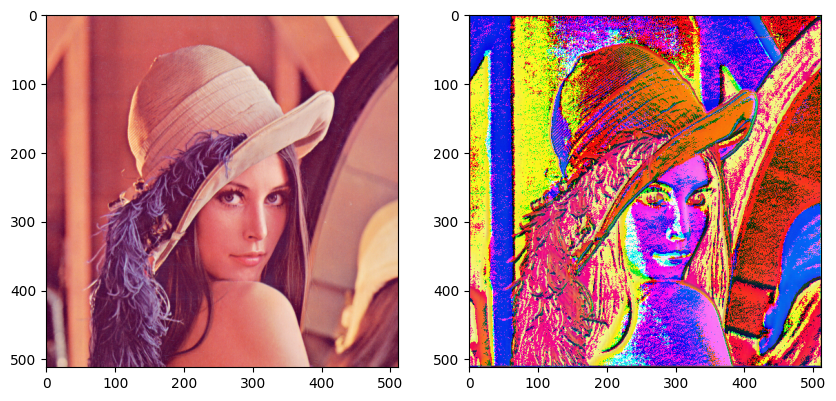

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image.astype('uint8'))
ax1.imshow(img_out[0].numpy().astype('uint8'));

Repita o mesmo procedimento, trocando padding de 'same' para 'valid', usando apenas um filtro.

In [ ]:
conv2 = Sequential([
    Conv2D(filters=1, kernel_size=(5, 5), padding="valid",
           input_shape=(None, None, 3))
])
conv2.output_shape

(None, None, None, 1)

In [ ]:
conv2.summary() # 1 filtro 5x5x3 ... a profundidade do filtro é de acordo com a entrada. 5x5x3 = 75; Não esqueça do bias!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, None, None, 1)       │              76 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76 (304.00 B)

 Trainable params: 76 (304.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
img_out = conv2(img_in)
img_out[0].shape

TensorShape([508, 508, 1])

Plote as duas imagens lado a lado

In [ ]:
#  Como tivemos que expandir a primeira dimensao para aplicar a convolução, podemos remover a dimensão unitária para plotar a imagem, usando a função squeeze()
i = img_out[0].numpy().squeeze()
i.shape

(508, 508)

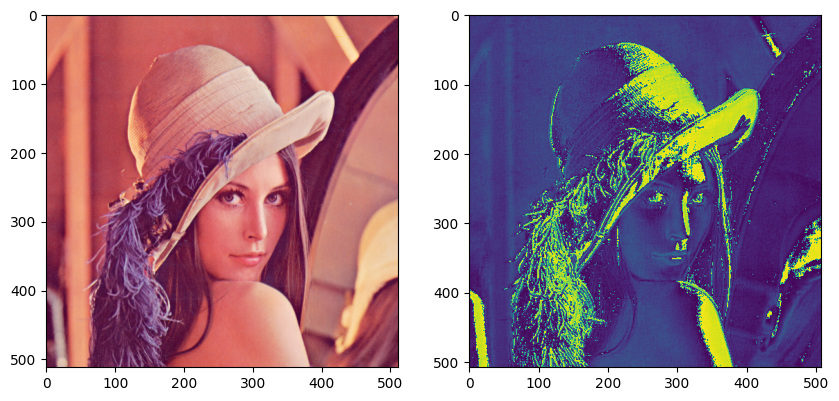

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image.astype('uint8'))
i = img_out[0].numpy().squeeze()
ax1.imshow(i.astype('uint8'));

## 1.4. Inicializando os filtros na mão


A função abaixo inicializa um array de dimensões 5,5,3,3 com todas as posições zero, exceto as posições 5,5,0,0 , 5,5,1,1 e 5,5,2,2 que recebem o valor 1/25.

In [ ]:
def my_filter(shape=(5, 5, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype=np.float32)
    array[:, :, 0, 0] = 1 / 25
    array[:, :, 1, 1] = 1 / 25
    array[:, :, 2, 2] = 1 / 25
    return array

In [ ]:
# transposição apenas para ajudar na visualização
np.transpose(my_filter(), (2, 3, 0, 1))

In [ ]:
# a função definida acima é usada para carregar valores nos filtros.
# use a função my_filter() para pre-inicializar os filtros do objeto conv3.
#
conv3 = Sequential([
     Conv2D(filters=3, kernel_size=(5, 5), padding="same",
           input_shape=(None, None, 3), kernel_initializer=my_filter)
])
conv3.output_shape

(None, None, None, 3)

## 1.5. Plote e observe o que aconte com a imagem (1pt)



Foi observada uma redução da nitidez na imagem.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


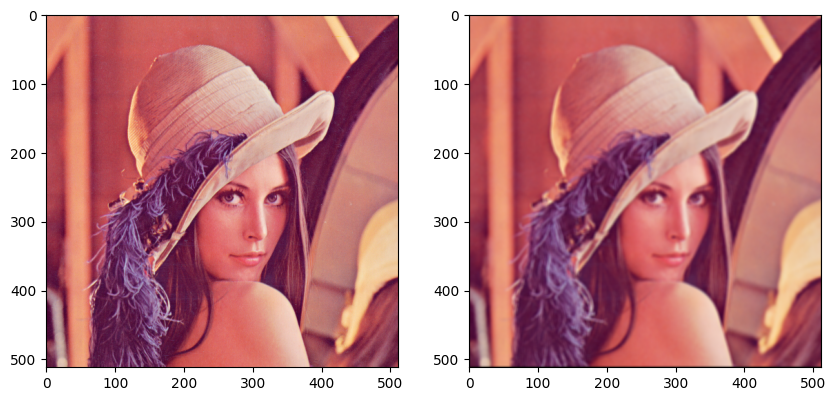

In [ ]:
# observe o que aconte com a imagem
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))
ax1.imshow(conv3.predict(img_in)[0].astype('uint8'));

### Responda

**ToDo** : Descreva suas observações sobre a imagem anterior.

# --- Group Response
O filtro utilizado tende a reduzir a nitidez ao misturar as cores de pixels vizinhos. Isso remove detalhes finos e suaviza transições. Ou seja, a redução da nitidez é o resultado direto do filtro de média aplicado, que já é projetado para suavizar a imagem. Se o objetivo é aumentar a nitidez, precisamos usar outro filtro.

## 1.6. Filtros de borda (5pt)

**ToDo** : Crie uma nova função para gerar um filtro de borda nos 3 canais da imagem de entrada. O filtro deve ser 3x3 e ter o formato [[0 0.2 0] [0 -0.2 0] [0 0 0]] (2pt)

***# --- Model***

In [ ]:
def my_new_filter(shape=(1, 3, 3, 3), dtype=None):
    None
    return None

Inicialize o objeto conv4 com seu novo filtro e aplique na imagem de entrada

In [ ]:
conv4 = Sequential(
    None
])
conv4.output_shape

In [ ]:
# Plote as duas iamgens lado a lado (filtrada e não filtrada)
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))
ax1.imshow(conv.predict(img_in)[0].astype('uint8'));

***# --- Group Response***

In [ ]:
## Para a função:

def my_new_filter(shape=(1, 3, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype=np.float32)  # Inicializa o filtro com zeros
    filter_matrix = np.array([[0, 0.2, 0],
                              [0, -0.2, 0],
                              [0, 0, 0]], dtype=np.float32)  # Filtro de borda

    # Aplicar o filtro de borda para cada canal (R, G, B):
    for i in range(3):
        array[0, :, :, i] = filter_matrix  # Mesmo filtro para cada canal

    return array

In [ ]:
# Inicializando o objeto conv4 com o novo filtro:
conv4 = Sequential([
    Conv2D(filters=3, kernel_size=(3, 3), padding="same",
           input_shape=(None, None, 3), kernel_initializer=my_new_filter)
])

conv4.output_shape

(None, None, None, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


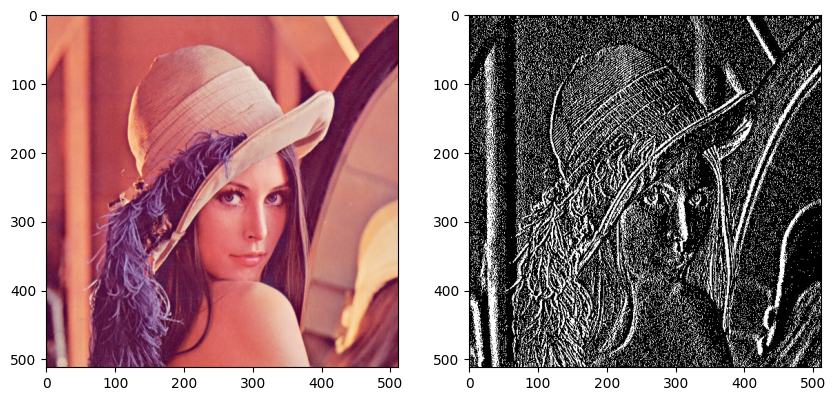

In [ ]:
# Aplicando o filtro na imagem de entrada:
#img_out = conv4.predict(img_in)

# Plotando as imagens lado a lado (original e filtrada)
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))  # Imagem original
#ax1.imshow(img_out[0].astype('uint8'))  # Imagem filtrada
ax1.imshow(conv4.predict(img_in)[0].astype('uint8'))  # Imagem filtrada

## 1.7. Pooling (14pt)



Aplique um max-pooling na imagem, com uma janela de 2x2. Faça com stride de 2 e observe o resultado na imagem de saída.

***# --- Model***

In [ ]:
# cria um objeto Sequencial de nome max_pool, apenas contendo uma camada de tf.keras.layer.MaxPool2D.
# lembre-se de colucar o parametro input-shape como input_shape=(None, None, 3)

max_pool = Sequential( # ToDo ...


In [ ]:
img_in = np.expand_dims(sample_image, 0) # expande a imagem
img_out = max_pool.predict(img_in) # aplica o pooling

In [ ]:
# plota as imagens lado a lado
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))
ax1.imshow(img_out[0].astype('uint8'));

***# --- Group Response***

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/pooling/base_pooling.py:23: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)


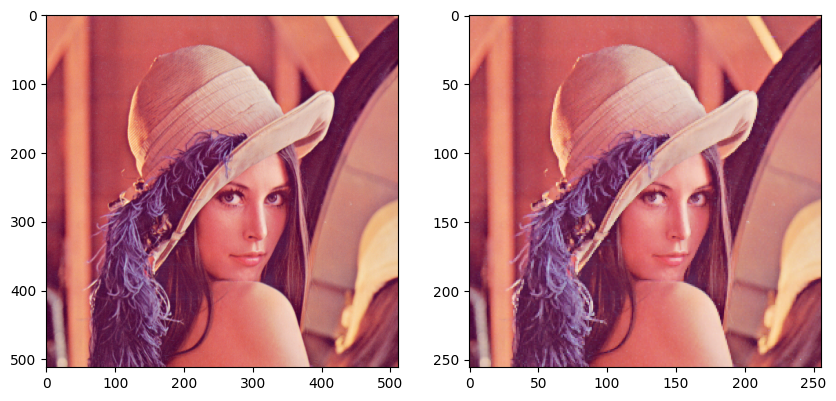

In [ ]:
# Cria um objeto Sequencial com uma camada de MaxPooling2D
max_pool = Sequential([
    MaxPool2D(pool_size=(2, 2), strides=2, padding='valid', input_shape=(None, None, 3))
])

# Expande a imagem para adicionar a dimensão do batch
img_in = np.expand_dims(sample_image, 0)

# Plota as imagens lado a lado
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image.astype('uint8'))  # Imagem original
ax1.imshow(max_pool.predict(img_in)[0].astype('uint8'))    # Imagem após max-pooling

Aumente o stride para 4, repita o processo e observe o resultado na imagem de saída.




***# --- Model***

In [ ]:
# cria um objeto Sequencial de nome max_pool, apenas contendo uma camada de tf.keras.layer.MaxPool2D.
# lembre-se de colucar o parametro input-shape como input_shape=(None, None, 3)
# Coloque o parametro stride para 4

max_pool2 = Sequential( # ToDo ...

In [ ]:
img_in = np.expand_dims(sample_image, 0) # expande a imagem
img_out = max_pool2.predict(img_in) # aplica o pooling

In [ ]:
# plota as imagens lado a lado
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))
ax1.imshow(img_out[0].astype('uint8'));

***# --- Group Response***

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


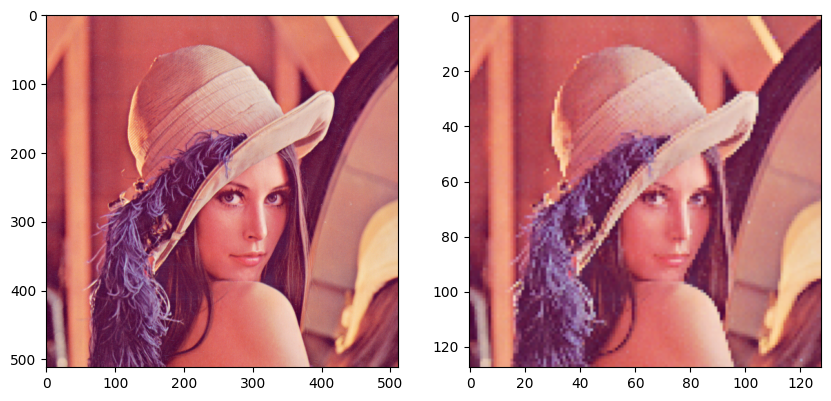

In [ ]:
max_pool = Sequential([
    MaxPool2D(pool_size=(2, 2), strides=4, padding='valid', input_shape=(None, None, 3))
])

# Expande a imagem para adicionar a dimensão do batch
img_in = np.expand_dims(sample_image, 0)

# Plota as imagens lado a lado
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image.astype('uint8'))  # Imagem original
ax1.imshow(max_pool.predict(img_in)[0].astype('uint8'))    # Imagem após max-pooling

Aumente o stride para 8, repita o processo e observe o resultado na imagem de saída. A

***# --- Model***

In [ ]:
# cria um objeto Sequencial de nome max_pool, apenas contendo uma camada de tf.keras.layer.MaxPool2D.
# lembre-se de colucar o parametro input-shape como input_shape=(None, None, 3)
# Coloque o parametro stride para 4

max_pool3 = Sequential( # ToDo ...

In [ ]:
img_in = np.expand_dims(sample_image, 0) # expande a imagem
img_out = max_pool3.predict(img_in) # aplica o pooling

In [ ]:
# plota as imagens lado a lado
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))
ax1.imshow(img_out[0].astype('uint8'));

***# --- Group Response***

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


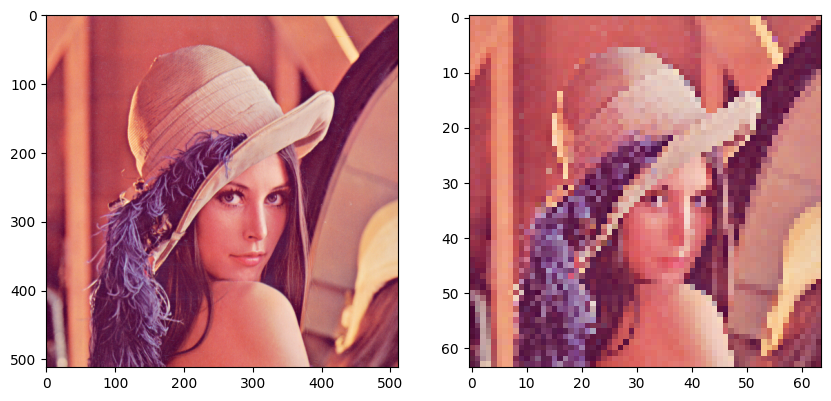

In [ ]:
max_pool = Sequential([
    MaxPool2D(pool_size=(2, 2), strides=8, padding='valid', input_shape=(None, None, 3))
])

# Expande a imagem para adicionar a dimensão do batch
img_in = np.expand_dims(sample_image, 0)

# Plota as imagens lado a lado
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image.astype('uint8'))  # Imagem original
ax1.imshow(max_pool.predict(img_in)[0].astype('uint8'))    # Imagem após max-pooling

### Responda

**ToDo** - Descreva o que aconteceu com o aumento do stride.

#--- Group Response
O max-pooling utiliza uma janela para selecionar o valor máximo de uma região da imagem. Quando o stride é pequeno, a janela de pooling se move apenas alguns pixels de cada vez, resultando em uma maior sobreposição entre as regiões analisadas. A janela de pooling "pula" mais pixels entre suas aplicações, reduzindo o número de pixels considerados para a imagem resultante. Essa subamostragem reduz a quantidade de informação retida na imagem de saída.

Ou seja, quanto maior o stride menor a qualidade da imagem.

# 2. Reconhecimento de Faces usando uma rede de convolução (20pt)




O objetivo desta etapa é classificar faces na base ORL (AT&T) Database (40 individuos x 10 imagens, de resolução 92x112 pixels e 256 níveis de cinza).

Baixe as imagens no site http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html ou da pasta dataset do Drive.

## 2.1. Preparando os dados (5pt)

In [ ]:
# carregue as imagens

# inicializa matrizes X e y
X = np.empty([400, 112, 92]) # 40 classe com 10 imgs cada, 10304 = 112x92
y = np.empty([400, 1])

# percorre todos os diretorios da base att e carrega as imagens
#imgs_path = "<my path>/datasets/att_faces"

imgs_path = "/content/drive/My Drive/datasets/AttFaces"

i=0
class_id = 0
for f in os.listdir(imgs_path):
    #print(f)
    if f.startswith("s"):
        class_id = class_id + 1
        for img_path in os.listdir(os.path.join(imgs_path,f)):
            if img_path.endswith(".pgm"):
                #print(img_path)
                X[i, :, :] = io.imread(os.path.join(imgs_path,f,img_path))
                y[i, :] = class_id
                i = i + 1


print("dimensões da matriz X = " , X.shape)

dimensões da matriz X =  (400, 112, 92)


***# --- Model***

In [ ]:
# Divida os dados em treino e teste (70%-30%) com a função train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( #Todo : complete

In [ ]:
X_train.shape

In [ ]:
X_test.shape

***# --- Group Response***

In [ ]:
# Divida os dados em treino e teste (70%-30%) com a função train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(280, 112, 92)
(120, 112, 92)


## 2.2. Implementando a rede (15pt)

Implemente uma rede de convolução simples, contendo 3 camadas de convolução seguidas de camadas max-pooling. Duas camadas densas (totalemtne conectadas) no final e por fim uma camada com ativação softmax para a classificação. Escolha filtros de tamanhos variados : (3,3) ou (5,5). Para cada camada, crie de 32 a 96 filtros.
Na camada densa, use de 64 a 200 neurônios.

Use o comando model.summary() para conferir a arquitetura.

***# --- Model***

In [ ]:
# Implementa uma rede de convolução simples, chamada model

input_size = (X.shape[1], X.shape[2],1)
n_classes = 40

model = models.Sequential()

model.add(layers.InputLayer( # ToDo ...
model.add(layers.Conv2D( # Todo ...
model.add(layers.MaxPooling2D( # Todo ..

# ToDo : adicionar as outras camadas

model.add(layers.Flatten()) # não esqueça da camada flatten ..

model.add(layers.Dense( # Todo ..
model.add(layers.Dense( # Todo: softmax

model.summary()

Seu modelo deve ter uma saída aproximadamente como abaixo:



```
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_60 (Conv2D)           (None, 110, 90, 32)       320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 55, 45, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 53, 43, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 26, 21, 64)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 24, 19, 64)        36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 29184)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                1867840   
_________________________________________________________________
dense_10 (Dense)             (None, 40)                2600      
=================================================================
Total params: 1,926,184
Trainable params: 1,926,184
Non-trainable params: 0
_________________________________________________________________
```



***# --- Group Response***

In [ ]:
# Implementa uma rede de convolução simples, chamada model
input_size = (X.shape[1], X.shape[2], 1)  # Ajustado para canais de cor (1 para imagens em preto e branco)
n_classes = 40  # Número de classes
model = models.Sequential()

# Camada de entrada
model.add(layers.InputLayer(input_shape=input_size))

## Camadas:
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))# padding='same'))    # 1° Camada com 32 filhos, com tamanho de (3x3):
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))# padding='same'))    # 2° Camada com 64 filhos, com tamanho de (5x5):
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu'))# padding='same'))    # 3° Camada com 96 filhos, com tamanho de (3x3):
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


# Camada flatten
model.add(layers.Flatten())

## Camadas Densas
model.add(layers.Dense(128, activation='relu'))    # 1° Camada Densa
model.add(layers.Dense(64, activation='relu'))     # 2° Camada Densa

# Camada de saída
model.add(layers.Dense(n_classes, activation='softmax'))


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 110, 90, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 55, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 51, 41, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 25, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 23, 18, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 11, 9, 96)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9504)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,216,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 40)                  │           2,600 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,334,472 (5.09 MB)

 Trainable params: 1,334,472 (5.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# repare bem o shape de x_train. A priumeira dimensão é o tamanho do lote, a segunda e terceira são referentes ao taamnho das imagens.
# repare que as imagens desta base tem apenas uma banda (escala de cinza)
X_train.shape

(280, 112, 92)

***# --- Model***

In [ ]:
# Como o tensor acima não contempla o tamanho de canais (no caso , igual a 1), deve-se expandir a última dimensão para deixar a entrada compatĩvel com o que é esperado pelo modelo do tf.keras
X_train_new = np.expand_dims( # Todo ..
X_test_new = np.expand_dims( # Todo ..

X_train_new.shape

***# --- Group Response***

In [ ]:
X_train_new = np.expand_dims(X_train, axis=-1)
X_test_new = np.expand_dims(X_test, axis=-1)

# print( X_train_new.shape)
# print( X_test_new.shape)

In [ ]:
# o vetor de rótulos não precisa ter duas diemnões.
y_train_new = y_train.squeeze()
y_test_new = y_test.squeeze()

# e deve ficar na faixa entre 0 e 39
y_train_new = y_train_new - 1
y_test_new = y_test_new - 1

In [ ]:
print(X_train_new.shape,y_train_new.shape)

(280, 112, 92, 1) (280,)


Compile o modelo usando o método de otimização=adam e função de custo (loss) = sparse_categorical_crossentropy.

***# --- Model***

In [ ]:
model.compile( # Todo ...

***# --- Group Response***


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Treine o modelo por 30 épocas com batch_size = 100.

***# --- Model***

In [ ]:
history = model.fit( # Todo ...

***# --- Group Response***

In [ ]:
history = model.fit(X_train_new, y_train_new,epochs=30,batch_size=100,validation_data=(X_test_new, y_test_new))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.0250 - loss: 30.6579 - val_accuracy: 0.0250 - val_loss: 19.1230
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.0368 - loss: 14.3597 - val_accuracy: 0.0417 - val_loss: 5.4793
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.0280 - loss: 5.0293 - val_accuracy: 0.0083 - val_loss: 4.0342
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.0225 - loss: 3.9439 - val_accuracy: 0.0083 - val_loss: 3.7284
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.0368 - loss: 3.6752 - val_accuracy: 0.0083 - val_loss: 3.7057
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.0305 - loss: 3.6458 - val_accuracy: 0.0750 - val_loss: 3.6816
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.0677 - loss: 3.6282 - val_accuracy: 0.0667 - val_loss: 3.6551
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.0873 - loss: 3.5848 - val_accuracy: 0.0083 - val_loss: 3.6291
Epoch 

O retorno da função fit() é um objeto para armazenar o histõrico do treino.

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plote a acurácia e o custo (loss) do treino e da validação.

4/4 - 1s - 197ms/step - accuracy: 0.8417 - loss: 0.5704


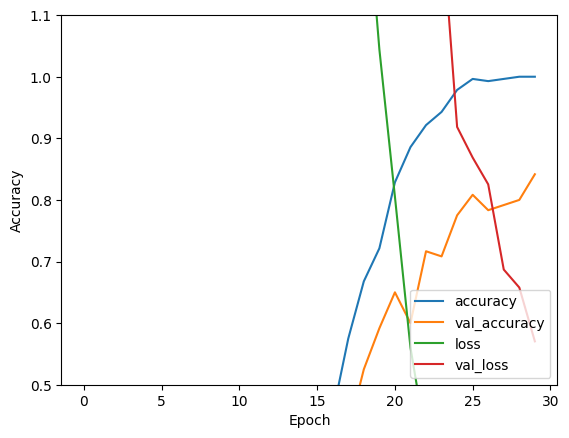

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.1])
plt.legend(loc='lower right')

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test_new,  y_test_new, verbose=2)

In [ ]:
print(test_acc)

0.7583333253860474


# 3. Usando um modelo Pré-treinado : VGG (10pt)

Carregando os dados da base AT&T para o VGG. Como a base está em escala de cinza e a entrada do modelo VGG espera uma imagem colorida (RGB), vamos repetir a mesma imagem em cada uma das bandas.

## 3.1. Preparando os dados (2pt)


In [ ]:
# inicializa matrizes X e y
X = np.empty([400, 112, 92, 3]) # 40 classe com 10 imgs cada, 10304 = 112x92
y = np.empty([400, 1])

# percorre todos os diretorios da base att e carrega as imagens
#imgs_path = "<my paths>/datasets/Att_Faces"
imgs_path = "/content/drive/My Drive/datasets/AttFaces"

i=0
class_id = 0
for f in os.listdir(imgs_path):
    #print(f)
    if f.startswith("s"):
        class_id = class_id + 1
        for img_path in os.listdir(os.path.join(imgs_path,f)):
            if img_path.endswith(".pgm"):
                #print(img_path)
                # copia msg imagem para os 3 canais
                X[i, :, :,0] = io.imread(os.path.join(imgs_path,f,img_path))
                X[i, :, :,1] = io.imread(os.path.join(imgs_path,f,img_path))
                X[i, :, :,2] = io.imread(os.path.join(imgs_path,f,img_path))
                y[i, :] = class_id-1
                i = i + 1

***# --- Model***

In [ ]:
# divida em 70% treino e 30% teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( # Todo ...
X_train.shape

***# --- Group Response***

In [ ]:
# Divida os dados em treino e teste (70%-30%) com a função train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(280, 112, 92, 3)
(120, 112, 92, 3)


## 3.2. Carrando o VGG direto da biblioteca do tensorflow (2pt)

In [ ]:
# https://www.tensorflow.org/guide/keras/functional?hl=pt_br

from tensorflow.keras.applications import VGG19
vgg19 = VGG19()

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
vgg19.summary() # repare a quantidade de parãmetros!

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

Vamos descartar as duas últimas camadas do VGG

In [ ]:
# https://www.tensorflow.org/guide/keras/functional?hl=pt_br
from tensorflow.keras.models import Model

#vgg_face_descriptor = Model(inputs=vgg19.layers[0].input, outputs=vgg19.layers[-2].output)
vgg_face_descriptor = Model(inputs=vgg19.input, outputs=vgg19.layers[-2].output)

### Responda

**ToDo** - Por que descartamos as duas últimas camadas do VGG?

#--- Group Response

 As últimas camadas do VGG19 são densas e possuem muitos parâmetros. Ao manter essas camadas no modelo, aumentamos bastante o risco de overfitting, especialmente se houver um novo conjunto de dados menor. Removendo essas camadas e substituindo por outras mais simples, por exemplo, o modelo se torna mais eficiente e menos propenso a se ajustar excessivamente aos dados de treinamento, o que ajuda a evitar overfitting.

## 3.3 Medindo Similaridade

### As funções abaixo servem para medir similaridade entre duas imagens, passando-se um vetor de características.

In [ ]:
def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

### A função verifyFace recebe duas imagens e calcula a similaridade entre elas. Se a similaridade for menor que epsilon, afirma-se que as duas imagens são de uma mesma pessa.

In [ ]:
epsilon = 0.0040

def verifyFace(img1, img2):

    img1_representation = vgg_face_descriptor.predict(img1, steps=None)[0,:]
    img2_representation = vgg_face_descriptor.predict(img2, steps=None)[0,:]

    cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)
    euclidean_distance = findEuclideanDistance(img1_representation, img2_representation)

    print("Similaridade com distancia do cosseno: ",cosine_similarity)
    print("Similaridade com distancia euclideana: ",euclidean_distance)

    if(cosine_similarity < epsilon):
        print("Verificado! Mesma pessoa!")
    else:
        print("Não-verificado! Não são a mesma pessoa!")

    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(np.squeeze(img1))
    plt.xticks([]); plt.yticks([])
    f.add_subplot(1,2, 2)
    plt.imshow(np.squeeze(img2))
    plt.xticks([]); plt.yticks([])
    plt.show(block=True)
    print("-----------------------------------------")

### Verificando a similaridade entre imagens (6pt)

Para 4 pares de imagens da base da AT&T e faça uma verificação entre elas, chamando a função verifyFace().

Antes de usar o VGG como um extrator de caracteristicas, normalize os dados dividindo os pixels por 255. Além disso, re-escalone as imagesn para o formato 224x224. Use a biblioteca OpenCV (cv2).

Faça para os pares : 64 e 33, 3 e 7, 40 e 44, 100 e 200.

***# --- Model***

In [ ]:
import cv2

# Ajuste as imagens para a entrada do modelo VGG

# exemplo, para o par 64 e 33 :

# Todo : Normaliza entre 0 e 1 , dividindo por 255
img1 = X[64,:,:,:] # Todo
img2 = X[33,:,:,:] # Todo

# Redimensione a imagem para (224,224) e coloca a primeira dimensão unitária
img1 = cv2.resize( # Todo
img2 = cv2.resize( # Todo

# lembre-se de expandir a primeira dimensão, pois nosso lote aqui é de 1 imagem
img1 = np.expand_dims( # Todo ..
img2 = np.expand_dims( # Todo ..

verifyFace(img1, img2)

***# --- Group Response***

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step
Similaridade com distancia do cosseno:  0.006738066673278809
Similaridade com distancia euclideana:  5.3952155
Não-verificado! Não são a mesma pessoa!


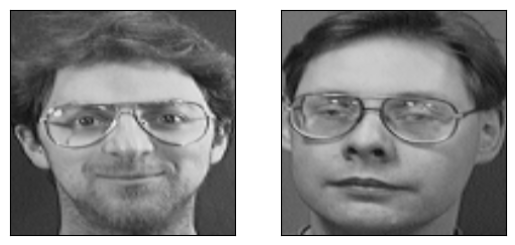

-----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
Similaridade com distancia do cosseno:  0.002663731575012207
Similaridade com distancia euclideana:  3.3674674
Verificado! Mesma pessoa!


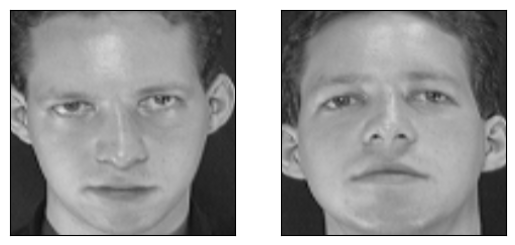

-----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step
Similaridade com distancia do cosseno:  0.009656786918640137
Similaridade com distancia euclideana:  6.3683834
Não-verificado! Não são a mesma pessoa!


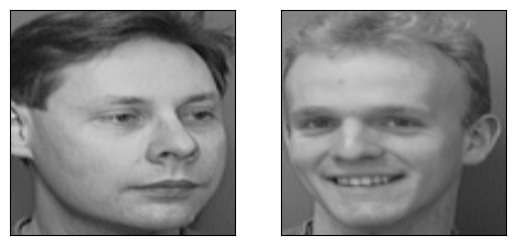

-----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step
Similaridade com distancia do cosseno:  0.013497114181518555
Similaridade com distancia euclideana:  7.7488227
Não-verificado! Não são a mesma pessoa!


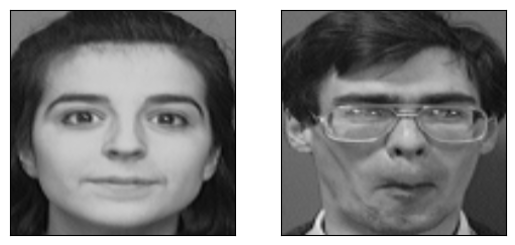

-----------------------------------------


In [ ]:
import cv2
import os
import numpy as np

# Função para carregar a base de dados AT&T
def load_image_ATandT(subfolder, img_idx):
    # Carregue a imagem a partir do caminho correto da subpasta
    img_path = os.path.join("/content/drive/My Drive/datasets/AttFaces", f"s{subfolder}", f"{img_idx}.pgm")
    img = cv2.imread(img_path)
    if img is None:
        print(f"Erro: Imagem {subfolder}/{img_idx}.pgm não foi carregada. Verifique o caminho: {img_path}")
    return img

# Pares de imagens (subpasta, número da imagem)
pares = [((7, 4), (4, 3)),  # 64 e 33 (s6/4.pgm e s3/3.pgm)
         ((1, 3), (1, 7)),  # 3 e 7 (s1/3.pgm e s1/7.pgm)
         ((4, 10), (5, 4)),  # 40 e 44 (s4/0.pgm e s4/4.pgm)
         ((10, 10), (20, 10))]  # 100 e 200 (s10/0.pgm e s20/0.pgm)

for (img1_idx, img2_idx) in pares:
    # Carrega as imagens correspondentes
    img1 = load_image_ATandT(img1_idx[0], img1_idx[1])
    img2 = load_image_ATandT(img2_idx[0], img2_idx[1])

    # Verifica se as imagens foram carregadas corretamente
    if img1 is None or img2 is None:
        continue  # Pula para o próximo par se houver erro no carregamento

    # Normaliza entre 0 e 1, dividindo por 255
    img1 = img1 / 255.0
    img2 = img2 / 255.0

    # Redimensiona as imagens para o formato de entrada do VGG19 (224x224)
    img1 = cv2.resize(img1, (224, 224))
    img2 = cv2.resize(img2, (224, 224))

    # Expande a primeira dimensão para incluir o batch size (necessário para o predict)
    img1 = np.expand_dims(img1, axis=0)
    img2 = np.expand_dims(img2, axis=0)

    # Chama a função de verificação de similaridade
    verifyFace(img1, img2)


# 4. Transferência de aprendizado (50pt)


Estude o tutorial do [link](https://www.tensorflow.org/tutorials/images/transfer_learning) e aplique o mesmo procedimento para ajustar um modelo previamente treinado com imagens da imagenet.
Use o MobileNetV2 como modelo base.

Todo: Faça o procedimento em duas etapas:


1.   Congele todas as camadas exceto as novas que você adicinou ao modelo. Treine.
2.   Libere todas as camadas paar o treinamento e treine novamente com um Learning Rate bem pequeno (um décimo do realizado no ítem 1).

In [ ]:
# Usando o mobileNet, as imagens devem ter entrada de 160x160x3 e normalizadas entre 0 e 1.
# Use a funçao abaixo para fazer o trabalho, conjuntamente com tf.data.Dataset.from_tensor_slices

IMG_SIZE = 160 # All images will be resized to 160x160
BATCH_SIZE = 32  # Tamanho do batch
SHUFFLE_BUFFER_SIZE = 1000  # Buffer para embaralhamento dos dados

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(280, 112, 92, 3)
(280, 1)
(120, 112, 92, 3)
(120, 1)


In [ ]:
# Tensorflow tem funções especĩficas para carregar os dados. Veja tf.data.Dataset

raw_train = tf.data.Dataset.from_tensor_slices((X_train,y_train))
raw_test = tf.data.Dataset.from_tensor_slices((X_test,y_test))

In [ ]:
train = raw_train.map(format_example)
test = raw_test.map(format_example)

In [ ]:
## Teste:
print(train.take(1))

<_TakeDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(1,), dtype=tf.float64, name=None))>


Seus dados devem ter o formato :



```
TensorShape([Dimension(280), Dimension(160), Dimension(160), Dimension(3)])

```



In [ ]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

## 4.1. Execute os passos (35pt):




1. Carregue o modelo pré-treinado do MobileNet, remova a última camada.
2. Adicione uma camdada de Global Average Pooling 2D (GAP)
3. Adicione uma camada densa para ajustar ao seu número de classes e use ativação softmax
4. Use função de custo loss='sparse_categorical_crossentropy'
5. Dentre os dados de treinamento, reserve 10% para validação do modelo.
6. Treine por 10 épocas.
7. Plote os gráficos de custo do treino e validação


***# --- Group Response***

Number of classes: 40
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 997ms/step - accuracy: 0.0222 - loss: 4.1284 - val_accuracy: 0.1786 - val_loss: 3.3073
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 753ms/step - accuracy: 0.3181 - loss: 2.9771 - val_accuracy: 0.5000 - val_loss: 2.5117
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 602ms/step - accuracy: 0.6935 - loss: 2.1321 - val_accuracy: 0.8571 - val_loss: 1.8072
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 963ms/step - accuracy: 0.9175 - loss: 1.4877 - val_accuracy: 0.9643 - val_loss: 1.2938
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 609ms/step - accuracy: 0.9620 - loss: 1.0606 - val_accuracy: 1.0000 - val_loss: 0.9597
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 962ms/step - accuracy: 0.9882 - loss: 0.7545 - val_accuracy: 1.0000 - val_loss: 0.7131
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 616ms/step - accuracy: 0.9973 - loss: 0.5440 - val_accuracy: 1.0000 - val_loss: 0.5414
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 626ms/s

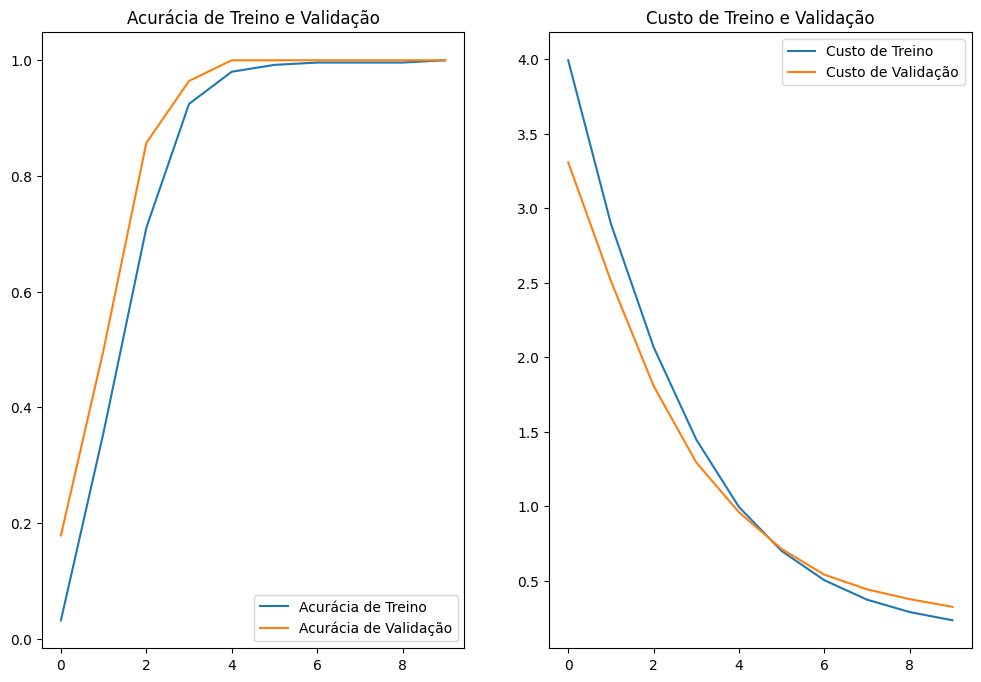

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Verificar o número de classes em y_train
num_classes = len(set(y_train.flatten()))  # Conta o número de classes únicas
print(f"Number of classes: {num_classes}")

# Carregar o MobileNet pré-treinado sem a última camada (head)
base_model = tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3),
                                               include_top=False,  # Remove a última camada
                                               weights='imagenet')

# Congelar as camadas do MobileNet para não treiná-las inicialmente
base_model.trainable = False

# Adicionar camadas personalizadas no topo
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),  # Global Average Pooling 2D
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Ajuste automático para o número de classes
])

# Compilar o modelo com a função de custo e otimizador
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Dividir o conjunto de treino em treino e validação (10% para validação)
validation_split = 0.1
num_validation_samples = int(len(X_train) * validation_split)

# Gerar batches de treino e validação
train_batches = train.skip(num_validation_samples).shuffle(1000).batch(BATCH_SIZE)
val_batches = train.take(num_validation_samples).batch(BATCH_SIZE)

# Treinar o modelo
history = model.fit(train_batches,
                    validation_data=val_batches,
                    epochs=10)

# Plotar gráficos de custo (loss) e acurácia do treino e validação
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Acurácia de Treino')
    plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
    plt.legend(loc='lower right')
    plt.title('Acurácia de Treino e Validação')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Custo de Treino')
    plt.plot(epochs_range, val_loss, label='Custo de Validação')
    plt.legend(loc='upper right')
    plt.title('Custo de Treino e Validação')
    plt.show()

# Chamar a função para plotar os gráficos
plot_history(history)


## 4.2. Fazendo testes (13pt)

Analize os gráficos. Você provavelmente deve ter observado overfitting.
Todo: Aplique algumas regularizações no modelo, para tentar reduzir o super-ajuste.Tente as opções abaixo:



1.   Dropout, antes da camada densa, de 50%
2.   Regularização nos pesos da camada densa (L1 ou L2)
3.   Dropout antes da camada de GAP



Veja exemplos no [link](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)

***# --- Group Response***

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.0265 - loss: 4.6888 - val_accuracy: 0.1071 - val_loss: 3.4438
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.0696 - loss: 3.7689 - val_accuracy: 0.1786 - val_loss: 2.9915
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 780ms/step - accuracy: 0.1660 - loss: 3.1343 - val_accuracy: 0.5357 - val_loss: 2.3450
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 845ms/step - accuracy: 0.3137 - loss: 2.5261 - val_accuracy: 0.8214 - val_loss: 1.8046
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 633ms/step - accuracy: 0.5043 - loss: 2.0906 - val_accuracy: 0.9286 - val_loss: 1.4373
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 930ms/step - accuracy: 0.6195 - loss: 1.5868 - val_accuracy: 0.9643 - val_loss: 1.1793
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 628ms/step - accuracy: 0.6908 - loss: 1.3214 - val_accuracy: 1.0000 - val_loss: 0.9384
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 960ms/step - accuracy: 0.8113 - loss: 1.0318 - val_accuracy: 1.0000 - val_loss: 0.

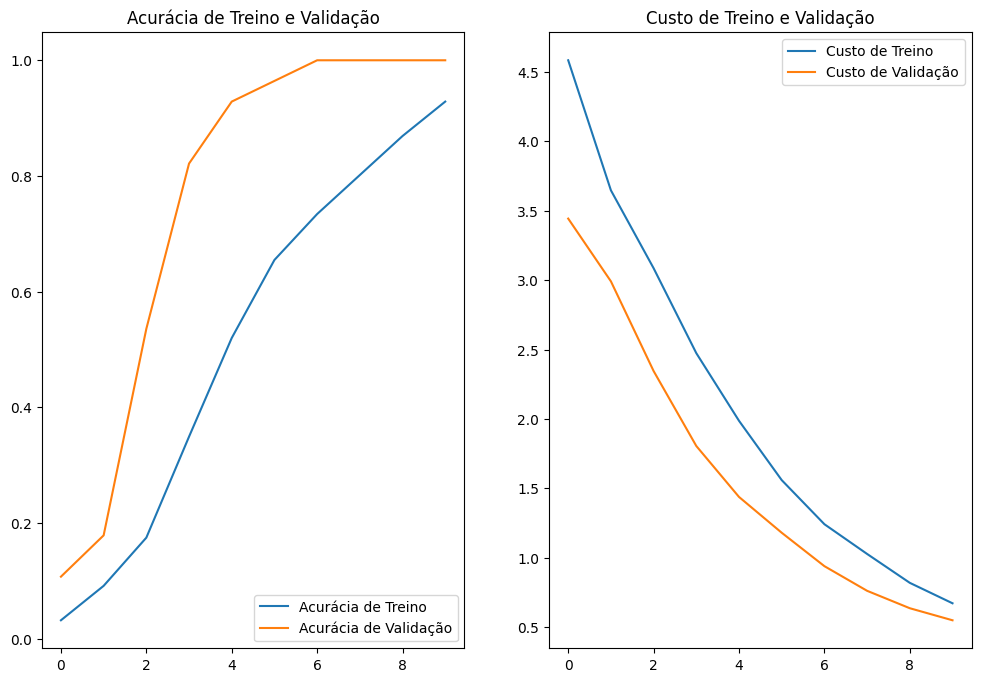

In [ ]:
## --- Dropout, antes da camada densa, de 50%.

# Adicionar camadas personalizadas no topo com Dropout
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),  # Camada Dropout de 50%
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Dividir o conjunto de treino em treino e validação (10% para validação)
validation_split = 0.1
num_validation_samples = int(len(X_train) * validation_split)

# Gerar batches de treino e validação
train_batches = train.skip(num_validation_samples).shuffle(1000).batch(BATCH_SIZE)
val_batches = train.take(num_validation_samples).batch(BATCH_SIZE)

# Treinar o modelo
history = model.fit(train_batches,
                    validation_data=val_batches,
                    epochs=10)

# Plotar gráficos de custo (loss) e acurácia do treino e validação
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Acurácia de Treino')
    plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
    plt.legend(loc='lower right')
    plt.title('Acurácia de Treino e Validação')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Custo de Treino')
    plt.plot(epochs_range, val_loss, label='Custo de Validação')
    plt.legend(loc='upper right')
    plt.title('Custo de Treino e Validação')
    plt.show()

# Chamar a função para plotar os gráficos
plot_history(history)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.0265 - loss: 4.8943 - val_accuracy: 0.2143 - val_loss: 3.8738
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 768ms/step - accuracy: 0.2756 - loss: 3.6762 - val_accuracy: 0.3929 - val_loss: 3.2621
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 842ms/step - accuracy: 0.6307 - loss: 2.8760 - val_accuracy: 0.7500 - val_loss: 2.6064
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 616ms/step - accuracy: 0.8981 - loss: 2.2260 - val_accuracy: 0.8929 - val_loss: 2.1064
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9644 - loss: 1.8087 - val_accuracy: 0.9643 - val_loss: 1.7983
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 621ms/step - accuracy: 0.9939 - loss: 1.4360 - val_accuracy: 1.0000 - val_loss: 1.5273
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 613ms/step - accuracy: 0.9889 - loss: 1.2284 - val_accuracy: 1.0000 - val_loss: 1.3649
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 891ms/step - accuracy: 0.9953 - loss: 1.0809 - val_accuracy: 1.0000 - val_loss: 1.22

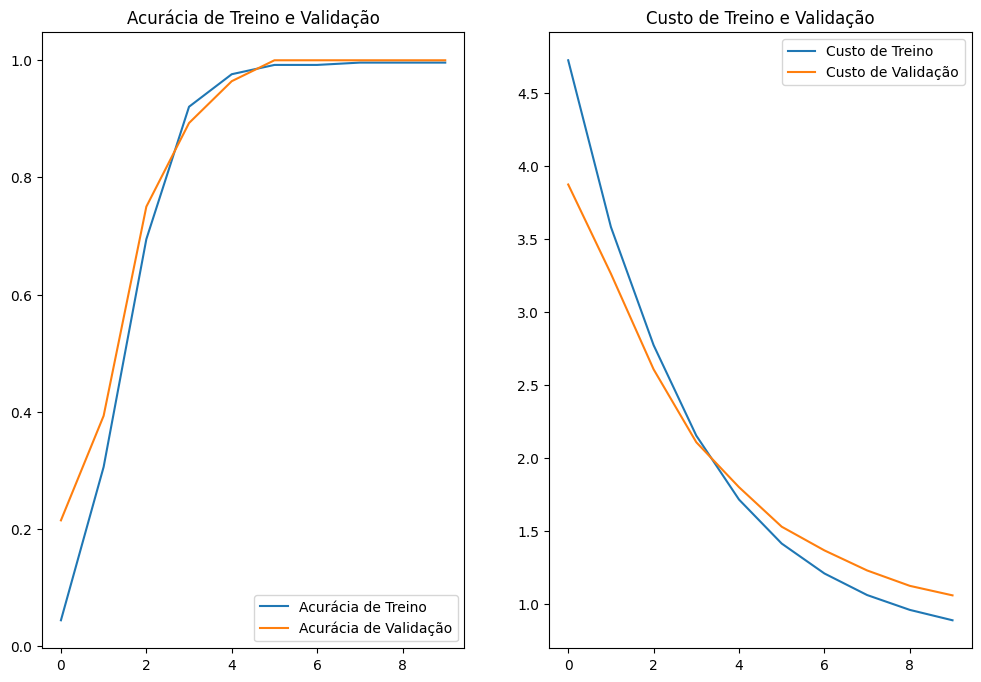

In [ ]:
## --- Regularização nos pesos da camada densa (L1 ou L2)

from tensorflow.keras import regularizers

# Adicionar camadas personalizadas no topo com regularização L2
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_classes,
                           activation='softmax',
                           kernel_regularizer=regularizers.l2(0.01))  # Regularização L2
])

# Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Dividir o conjunto de treino em treino e validação (10% para validação)
validation_split = 0.1
num_validation_samples = int(len(X_train) * validation_split)

# Gerar batches de treino e validação
train_batches = train.skip(num_validation_samples).shuffle(1000).batch(BATCH_SIZE)
val_batches = train.take(num_validation_samples).batch(BATCH_SIZE)

# Treinar o modelo
history = model.fit(train_batches,
                    validation_data=val_batches,
                    epochs=10)

# Plotar gráficos de custo (loss) e acurácia do treino e validação
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Acurácia de Treino')
    plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
    plt.legend(loc='lower right')
    plt.title('Acurácia de Treino e Validação')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Custo de Treino')
    plt.plot(epochs_range, val_loss, label='Custo de Validação')
    plt.legend(loc='upper right')
    plt.title('Custo de Treino e Validação')
    plt.show()

# Chamar a função para plotar os gráficos
plot_history(history)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.0335 - loss: 3.9530 - val_accuracy: 0.1786 - val_loss: 3.2941
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 644ms/step - accuracy: 0.2634 - loss: 2.9055 - val_accuracy: 0.4643 - val_loss: 2.4074
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 693ms/step - accuracy: 0.7025 - loss: 2.0762 - val_accuracy: 0.8214 - val_loss: 1.8275
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 668ms/step - accuracy: 0.8699 - loss: 1.5228 - val_accuracy: 1.0000 - val_loss: 1.3783
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 946ms/step - accuracy: 0.9691 - loss: 1.0875 - val_accuracy: 1.0000 - val_loss: 1.0467
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 655ms/step - accuracy: 0.9829 - loss: 0.7326 - val_accuracy: 1.0000 - val_loss: 0.8112
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 890ms/step - accuracy: 0.9892 - loss: 0.5862 - val_accuracy: 1.0000 - val_loss: 0.6433
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 675ms/step - accuracy: 0.9901 - loss: 0.4462 - val_accuracy: 1.0000 - val_loss: 

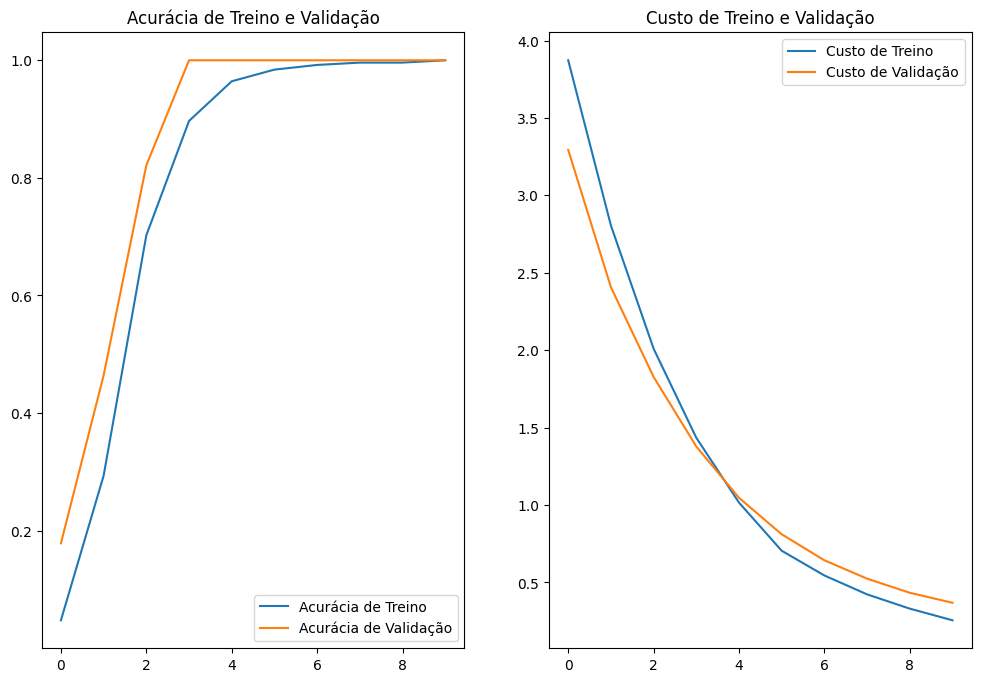

In [ ]:
## --- Dropout antes da camada de GAP.

# Adicionar camadas personalizadas no topo com Dropout antes da GAP
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dropout(0.5),  # Camada Dropout de 50% antes da GAP
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Dividir o conjunto de treino em treino e validação (10% para validação)
validation_split = 0.1
num_validation_samples = int(len(X_train) * validation_split)

# Gerar batches de treino e validação
train_batches = train.skip(num_validation_samples).shuffle(1000).batch(BATCH_SIZE)
val_batches = train.take(num_validation_samples).batch(BATCH_SIZE)

# Treinar o modelo
history = model.fit(train_batches,
                    validation_data=val_batches,
                    epochs=10)

# Plotar gráficos de custo (loss) e acurácia do treino e validação
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Acurácia de Treino')
    plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
    plt.legend(loc='lower right')
    plt.title('Acurácia de Treino e Validação')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Custo de Treino')
    plt.plot(epochs_range, val_loss, label='Custo de Validação')
    plt.legend(loc='upper right')
    plt.title('Custo de Treino e Validação')
    plt.show()

# Chamar a função para plotar os gráficos
plot_history(history)

### Responda (2pt)

**ToDo** - com qual configuração conseguiu resolver o overfitting?

Na nossa configuração, não encontramos o problema de overfitting.